**Código realizado por:**\
Camilo José Sierra Otero\

In [ ]:
!pip -q install astroquery

In [ ]:
# Se importa la librería
from astroquery.jplhorizons import Horizons

# Se asigna el astro respectivo en la libreria Horizons al sol

sol = Horizons(id='sun',
               location ='@ssb',
               epochs = {'start': '2000-01-01',
                         'stop': '2100-01-01',
                         'step': '90d'}).vectors().to_pandas()
# Creacion del DataFrame en Pandas con las posiciones del sol a lo largo de
# 100 años medida cada 3 meses.

sol

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
0,Sun (10),2451544.5,A.D. 2000-Jan-01 00:00:00.0000,-0.007140,-0.002792,0.000206,5.374262e-06,-0.000007,-9.423857e-08,0.000044,0.007669,-2.307579e-06
1,Sun (10),2451634.5,A.D. 2000-Mar-31 00:00:00.0000,-0.006622,-0.003428,0.000197,6.137402e-06,-0.000007,-1.179245e-07,0.000043,0.007460,-2.359078e-06
2,Sun (10),2451724.5,A.D. 2000-Jun-29 00:00:00.0000,-0.006033,-0.003998,0.000185,6.908117e-06,-0.000006,-1.433111e-07,0.000042,0.007240,-2.504548e-06
3,Sun (10),2451814.5,A.D. 2000-Sep-27 00:00:00.0000,-0.005385,-0.004489,0.000171,7.482462e-06,-0.000005,-1.572935e-07,0.000041,0.007013,-2.532691e-06
4,Sun (10),2451904.5,A.D. 2000-Dec-26 00:00:00.0000,-0.004684,-0.004899,0.000156,8.088297e-06,-0.000004,-1.791661e-07,0.000039,0.006780,-2.671209e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
401,Sun (10),2487634.5,A.D. 2098-Oct-23 00:00:00.0000,0.008051,-0.002568,-0.000222,3.087418e-06,0.000008,-1.268191e-07,0.000049,0.008454,5.818320e-07
402,Sun (10),2487724.5,A.D. 2099-Jan-21 00:00:00.0000,0.008291,-0.001846,-0.000232,2.167905e-06,0.000008,-1.029976e-07,0.000049,0.008497,3.311562e-07
403,Sun (10),2487814.5,A.D. 2099-Apr-21 00:00:00.0000,0.008439,-0.001099,-0.000241,1.154591e-06,0.000008,-8.186722e-08,0.000049,0.008513,7.122654e-08
404,Sun (10),2487904.5,A.D. 2099-Jul-20 00:00:00.0000,0.008503,-0.000346,-0.000247,2.714962e-07,0.000008,-6.297352e-08,0.000049,0.008514,-6.822855e-08


In [ ]:
# Se establece la relación entre au y Gm donde 1 AU es equivalente a 149.7 Gm

pos_Gm = sol[['x','y','z']]*149.7
pos_Gm

,x,y,z
0,-1.068838,-0.418006,0.030890
1,-0.991334,-0.513205,0.029471
2,-0.903197,-0.598531,0.027690
3,-0.806154,-0.671981,0.025662
4,-0.701125,-0.733449,0.023395
...,...,...,...
401,1.205239,-0.384425,-0.033235
402,1.241108,-0.276392,-0.034797
403,1.263266,-0.164489,-0.036022
404,1.272962,-0.051750,-0.037009


In [ ]:
# Se establece la relación entre las dimensiones de velocidad en au/d a m/s
# de forma que: 1 au/d = 1.731e6 m/s

norm_vel = sol[['vx','vy','vz']]*1.371*10**6
norm_vel

,vx,vy,vz
0,7.368113,-10.160438,-0.129201
1,8.414378,-9.225398,-0.161675
2,9.471029,-8.082995,-0.196479
3,10.258455,-6.890302,-0.215649
4,11.089056,-5.540501,-0.245637
...,...,...,...
401,4.232851,10.659809,-0.173869
402,2.972198,11.274701,-0.141210
403,1.582944,11.424921,-0.112240
404,0.372221,11.521597,-0.086337


In [ ]:
# Importamos la librería Numpy para realizar el calculo de la magnitud
# del vector de distancia tomando como valores los parámetros x,y,z.

import numpy as np
import pandas as pd

# El vector distancia es la magnitud de los 3 valores de la posición en
# las 3 dimensiones espaciales. El caso idéntico sucede para la velocidad.

distancia = np.zeros(len(pos_Gm))
velocidad = np.zeros(len(norm_vel))

for i in range(len(pos_Gm)):
  distancia[i] = np.linalg.norm(pos_Gm.iloc[i])
  velocidad[i] = np.linalg.norm(norm_vel.iloc[i])


# Se incorporan los datos a un DataFrame de Pandas.
distancia = pd.DataFrame(distancia, columns = ['Distancia'])
velocidad = pd.DataFrame(velocidad, columns = ['Velocidad'])

distancia

,Distancia
0,1.148085
1,1.116687
2,1.083869
3,1.049811
4,1.014924
...,...
401,1.265499
402,1.271988
403,1.274439
404,1.274551


In [ ]:
velocidad

,Velocidad
0,12.551506
1,12.487428
2,12.452863
3,12.359558
4,12.398574
...,...
401,11.470780
402,11.660737
403,11.534606
404,11.527931


In [ ]:
# Ahora incorporamos los nuevos dataFrame dentro del dataframe inicial.

sol['Distancia'] = distancia
sol['Velocidad'] = velocidad

sol

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate,Distancia,Velocidad
0,Sun (10),2451544.5,A.D. 2000-Jan-01 00:00:00.0000,-0.007140,-0.002792,0.000206,5.374262e-06,-0.000007,-9.423857e-08,0.000044,0.007669,-2.307579e-06,1.148085,12.551506
1,Sun (10),2451634.5,A.D. 2000-Mar-31 00:00:00.0000,-0.006622,-0.003428,0.000197,6.137402e-06,-0.000007,-1.179245e-07,0.000043,0.007460,-2.359078e-06,1.116687,12.487428
2,Sun (10),2451724.5,A.D. 2000-Jun-29 00:00:00.0000,-0.006033,-0.003998,0.000185,6.908117e-06,-0.000006,-1.433111e-07,0.000042,0.007240,-2.504548e-06,1.083869,12.452863
3,Sun (10),2451814.5,A.D. 2000-Sep-27 00:00:00.0000,-0.005385,-0.004489,0.000171,7.482462e-06,-0.000005,-1.572935e-07,0.000041,0.007013,-2.532691e-06,1.049811,12.359558
4,Sun (10),2451904.5,A.D. 2000-Dec-26 00:00:00.0000,-0.004684,-0.004899,0.000156,8.088297e-06,-0.000004,-1.791661e-07,0.000039,0.006780,-2.671209e-06,1.014924,12.398574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Sun (10),2487634.5,A.D. 2098-Oct-23 00:00:00.0000,0.008051,-0.002568,-0.000222,3.087418e-06,0.000008,-1.268191e-07,0.000049,0.008454,5.818320e-07,1.265499,11.470780
402,Sun (10),2487724.5,A.D. 2099-Jan-21 00:00:00.0000,0.008291,-0.001846,-0.000232,2.167905e-06,0.000008,-1.029976e-07,0.000049,0.008497,3.311562e-07,1.271988,11.660737
403,Sun (10),2487814.5,A.D. 2099-Apr-21 00:00:00.0000,0.008439,-0.001099,-0.000241,1.154591e-06,0.000008,-8.186722e-08,0.000049,0.008513,7.122654e-08,1.274439,11.534606
404,Sun (10),2487904.5,A.D. 2099-Jul-20 00:00:00.0000,0.008503,-0.000346,-0.000247,2.714962e-07,0.000008,-6.297352e-08,0.000049,0.008514,-6.822855e-08,1.274551,11.527931


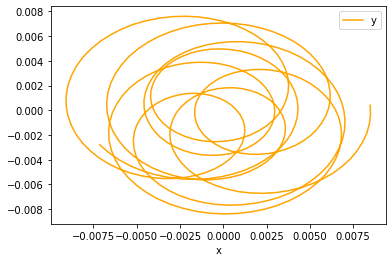

In [ ]:
# Ahora se procede a importar la librería de matplotlib para realizar gráficos

import matplotlib.pyplot as plt
import matplotlib.animation as animation


grafico1 = sol.plot(x='x', y='y', color='orange')

(array([122]),)
La distancia minima del sol es de 0.093 Gm, que ocurre en A.D. 2030-Jan-23 00:00:00.0000


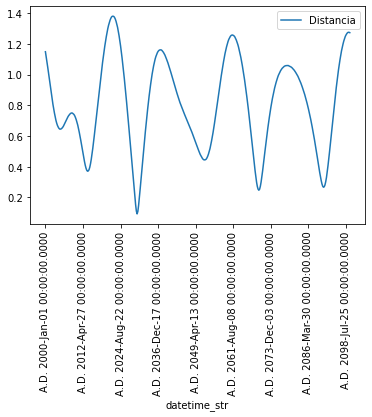

In [ ]:
# Ahora se grafica la magnitud de la distancia del sol cada 100 años.
grafico2 = sol.plot(x='datetime_str', y='Distancia')
plt.xticks(rotation=90)

# Distancia minima del sol:
dist_min = min(sol.Distancia)

# Fecha en la que ocurre dicha distancia mínima:
pos_min = np.where(sol.Distancia == dist_min)
print(pos_min)
fecha_min = sol.datetime_str[122]


print(f'La distancia minima del sol es de {dist_min:.3f} Gm, que ocurre en {fecha_min}')

In [ ]:
# Cálculo de la velocidad radial desde Próxima Centauri B

v_rad = np.zeros(len(norm_vel))
u = [+0.36,+0.28,+0.89]
v_u = pd.DataFrame.to_numpy(norm_vel)

for i in range(len(norm_vel)):
  v_rad[i] = np.dot(v_u[i],u)

sol['velradial'] = v_rad

sol

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate,Distancia,Velocidad,velradial
0,Sun (10),2451544.5,A.D. 2000-Jan-01 00:00:00.0000,-0.007140,-0.002792,0.000206,5.374262e-06,-0.000007,-9.423857e-08,0.000044,0.007669,-2.307579e-06,1.148085,12.551506,-0.307391
1,Sun (10),2451634.5,A.D. 2000-Mar-31 00:00:00.0000,-0.006622,-0.003428,0.000197,6.137402e-06,-0.000007,-1.179245e-07,0.000043,0.007460,-2.359078e-06,1.116687,12.487428,0.302174
2,Sun (10),2451724.5,A.D. 2000-Jun-29 00:00:00.0000,-0.006033,-0.003998,0.000185,6.908117e-06,-0.000006,-1.433111e-07,0.000042,0.007240,-2.504548e-06,1.083869,12.452863,0.971465
3,Sun (10),2451814.5,A.D. 2000-Sep-27 00:00:00.0000,-0.005385,-0.004489,0.000171,7.482462e-06,-0.000005,-1.572935e-07,0.000041,0.007013,-2.532691e-06,1.049811,12.359558,1.571831
4,Sun (10),2451904.5,A.D. 2000-Dec-26 00:00:00.0000,-0.004684,-0.004899,0.000156,8.088297e-06,-0.000004,-1.791661e-07,0.000039,0.006780,-2.671209e-06,1.014924,12.398574,2.222103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Sun (10),2487634.5,A.D. 2098-Oct-23 00:00:00.0000,0.008051,-0.002568,-0.000222,3.087418e-06,0.000008,-1.268191e-07,0.000049,0.008454,5.818320e-07,1.265499,11.470780,4.353830
402,Sun (10),2487724.5,A.D. 2099-Jan-21 00:00:00.0000,0.008291,-0.001846,-0.000232,2.167905e-06,0.000008,-1.029976e-07,0.000049,0.008497,3.311562e-07,1.271988,11.660737,4.101231
403,Sun (10),2487814.5,A.D. 2099-Apr-21 00:00:00.0000,0.008439,-0.001099,-0.000241,1.154591e-06,0.000008,-8.186722e-08,0.000049,0.008513,7.122654e-08,1.274439,11.534606,3.668944
404,Sun (10),2487904.5,A.D. 2099-Jul-20 00:00:00.0000,0.008503,-0.000346,-0.000247,2.714962e-07,0.000008,-6.297352e-08,0.000049,0.008514,-6.822855e-08,1.274551,11.527931,3.283207


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

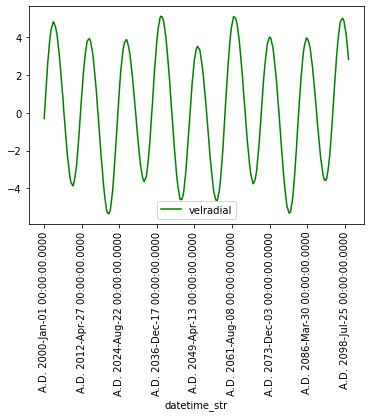

In [ ]:
# Gráfica velocidad radial en función del tiempo
grafico3 = sol.plot(x='datetime_str', y='velradial', color='green')
plt.xticks(rotation=90)

In [ ]:
interseccion = sol.loc[sol['velradial']>3.8]
interseccion

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate,Distancia,Velocidad,velradial
8,Sun (10),2452264.5,A.D. 2001-Dec-21 00:00:00.0000,-0.001633,-0.005594,0.000084,0.000009,1.557681e-07,-2.111826e-07,0.000034,0.005828,-2.555291e-06,0.872415,11.758429,4.033166
9,Sun (10),2452354.5,A.D. 2002-Mar-21 00:00:00.0000,-0.000868,-0.005535,0.000065,0.000008,1.165768e-06,-2.179992e-07,0.000032,0.005603,-2.457810e-06,0.838711,11.645640,4.332880
10,Sun (10),2452444.5,A.D. 2002-Jun-19 00:00:00.0000,-0.000127,-0.005383,0.000045,0.000008,2.167054e-06,-2.134417e-07,0.000031,0.005384,-2.356891e-06,0.806020,11.388802,4.528047
11,Sun (10),2452534.5,A.D. 2002-Sep-17 00:00:00.0000,0.000575,-0.005153,0.000027,0.000008,2.924686e-06,-2.091278e-07,0.000030,0.005185,-2.062188e-06,0.776158,11.193244,4.628277
12,Sun (10),2452624.5,A.D. 2002-Dec-16 00:00:00.0000,0.001246,-0.004849,0.000008,0.000007,3.861447e-06,-2.057812e-07,0.000029,0.005006,-1.940165e-06,0.749436,11.242202,4.800157
13,Sun (10),2452714.5,A.D. 2003-Mar-16 00:00:00.0000,0.001865,-0.004461,-0.000010,0.000006,4.662248e-06,-1.913812e-07,0.000028,0.004835,-1.801006e-06,0.723868,10.951742,4.756274
14,Sun (10),2452804.5,A.D. 2003-Jun-14 00:00:00.0000,0.002418,-0.004016,-0.000027,0.000006,5.227389e-06,-1.855345e-07,0.000027,0.004688,-1.472242e-06,0.701781,10.735714,4.656443
15,Sun (10),2452894.5,A.D. 2003-Sep-12 00:00:00.0000,0.002911,-0.003518,-0.000043,0.000005,5.825565e-06,-1.693661e-07,0.000026,0.004566,-1.238427e-06,0.683516,10.613042,4.544330
16,Sun (10),2452984.5,A.D. 2003-Dec-11 00:00:00.0000,0.003334,-0.002973,-0.000057,0.000004,6.250038e-06,-1.546771e-07,0.000026,0.004468,-9.148977e-07,0.668843,10.437970,4.354929
17,Sun (10),2453074.5,A.D. 2004-Mar-10 00:00:00.0000,0.003692,-0.002388,-0.000071,0.000004,6.749521e-06,-1.418101e-07,0.000025,0.004397,-6.889397e-07,0.658266,10.452952,4.166749


Haciendo observación visual de la tabla y el gráfico, podemos medir la distancia entre los picos. Una medición de la distancia entre dos puntos que interceptan en eje x no es posible de calcular debido a que en la tabla no hay datos que sean estrictamente iguales a cero, lo cual convierte el proceso de cálculo de fechas en algo tedioso puesto que se debe establecer mediante intervalos muy pequeños que tiendan a cero, donde los datos tienden a ser abundantes.

Ergo, para determinar el periodo del sol, solo basta observar los dos picos próximos, siendo el primero el 16 de diciembre de 2002 y el siguiente el 14 de octubre del 2014, esto arroja un periodo aproximado de 11 años y 10 meses (o 4351 días). Mientras que Jupiter tiene un periodo orbital de 11.86 años y Saturno un periodo de 29 años. Esto quiere decir que el sol tiene un periodo menor que el de saturno, pero similar al periodo de Jupiter.